**Python final project : Non defaulters data analysis**

**Content:**
1. [Introduction:](#1)
2. [Installing and importing libraries:](#2)
3. [Data information:](#3)
4. [Data exploration:](#4)
    1. [Data Structure](#5)
    1. [Schema](#6)
    1. [Missing Data](#7)
5. [Cleaning and data transformation:](#8)
    1. [Schema Correction](#9)
    1. [Cleaning missing data](#10)
6. [Data visualization:](#11)
    1. [Categorical Views](#12)
    1. [Numerical Views](#13)
7. [Conclusion:](#14)

<a id="1"></a> <br>
# 1. **INTRODUCTION**

This case study aims to identify patterns which indicate is a default (default = 0), or non default (default = 1), i.e., we want to understand why a customer fails to honor with their debts based on the behavior of other attributes, such as salary, schooling and financial transactions which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate. Identification of such applicants using EDA is the aim of this case study.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="2"></a> <br>
# 2.**INSTALLING AND IMPORTING LIBRARIES**

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


<a id="3"></a> <br>
# 3.**DATA INFORMATION**

In [3]:
df = pd.read_csv("/content/Python_M10_support_material.csv", na_values= "na")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [5]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


<a id="4"></a> <br>
# 4.**DATA EXPLORATION**


<a id="5"></a> <br>
### DATA STRUCTURE


In [22]:
df.shape

(10127, 16)

In [23]:
df[df['default'] == 0].shape

(8500, 16)

In [24]:
df[df['default'] == 1].shape

(1627, 16)

In [25]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [26]:
print(f"The proportion of repayer customers is {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"The proportion of defaulter customers is {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

The proportion of repayer customers is 83.93%
The proportion of defaulter customers is 16.07%


<a id="6"></a> <br>
### SCHEMA

In [27]:
df.head(n=5)


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [28]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [29]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [30]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


<a id="7"></a> <br>
### MISSING DATA


In [31]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [16]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [17]:
df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [18]:
#The function below raises some statistics about the missing data columns.
def stats_missing_data(df: pd.DataFrame) -> None:

  stats_missing_data = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_missing_data = {col: {'quantity': qtd, "percentage": round(100 * qtd/total, 2)}}
      stats_missing_data.append(dict_missing_data)

  for stat in stats_missing_data:
    print(stat)

In [19]:
stats_missing_data(df=df)

{'escolaridade': {'quantity': 1519, 'percentage': 15.0}}
{'estado_civil': {'quantity': 749, 'percentage': 7.4}}
{'salario_anual': {'quantity': 1112, 'percentage': 10.98}}


In [20]:
stats_missing_data(df=df[df['default'] == 0])

{'escolaridade': {'quantity': 1263, 'percentage': 14.86}}
{'estado_civil': {'quantity': 620, 'percentage': 7.29}}
{'salario_anual': {'quantity': 925, 'percentage': 10.88}}


In [21]:
stats_missing_data(df=df[df['default'] == 1])

{'escolaridade': {'quantity': 256, 'percentage': 15.73}}
{'estado_civil': {'quantity': 129, 'percentage': 7.93}}
{'salario_anual': {'quantity': 187, 'percentage': 11.49}}


<a id="8"></a> <br>
# 5.**CLEANING AND TRASNFORMATION DATA**


<a id="9"></a> <br>
### SCHEMA CORRECTION


In [32]:
#Limite_credito e valor_transacoes_12m columns was read by dtype = object
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [33]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [34]:
#lambda function to clean data. Quick test with map function.
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [35]:
#Lambda function ready we apply to the columns.
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [36]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [37]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [38]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


<a id="10"></a> <br>
### CLEANING MISSIG DATA


In [39]:
df.dropna(inplace=True)

In [40]:
df.shape

(7081, 16)

In [41]:
df[df['default'] == 0].shape

(5968, 16)

In [42]:
df[df['default'] == 1].shape

(1113, 16)

In [43]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [44]:
print(f"The proportion of active repayer is {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"The new proportion of repayer customers is {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"The proportion of defaulter customers is {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"The new proportion of defaulter customers is {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

The proportion of active repayer is 83.93%
The new proportion of repayer customers is 84.28%

The proportion of defaulter customers is 16.07%
The new proportion of defaulter customers is 15.72%


<a id="11"></a> <br>
# 6.**DATA VISUALIZATION**


In [45]:
#Split defaulting from non defaulting custmoers
df_repayer = df[df['default'] == 0]

In [46]:
df_defaulter = df[df['default'] == 1]

<a id="12"></a> <br>
### CATEGORICAL VIEWS


In [47]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


**-CIVIL STATUS**

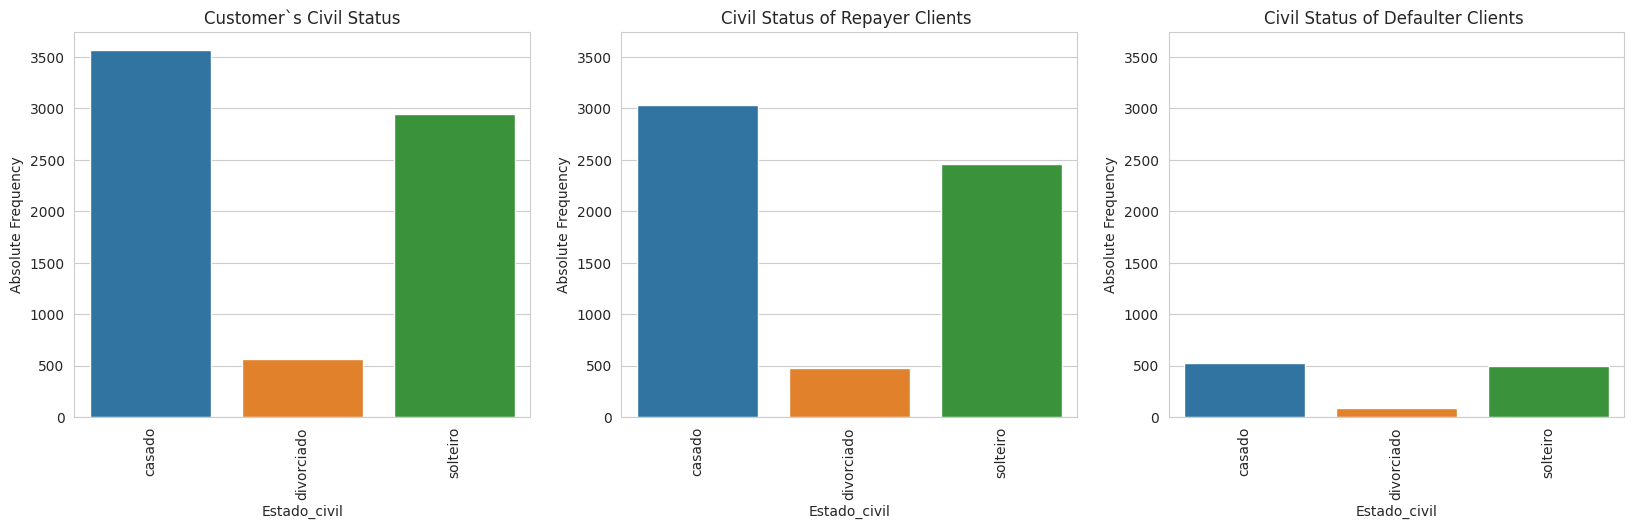

In [48]:
coluna = 'estado_civil'
titulos = ['Customer`s Civil Status', 'Civil Status of Repayer Clients ', 'Civil Status of Defaulter Clients ']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-EDUCATION**

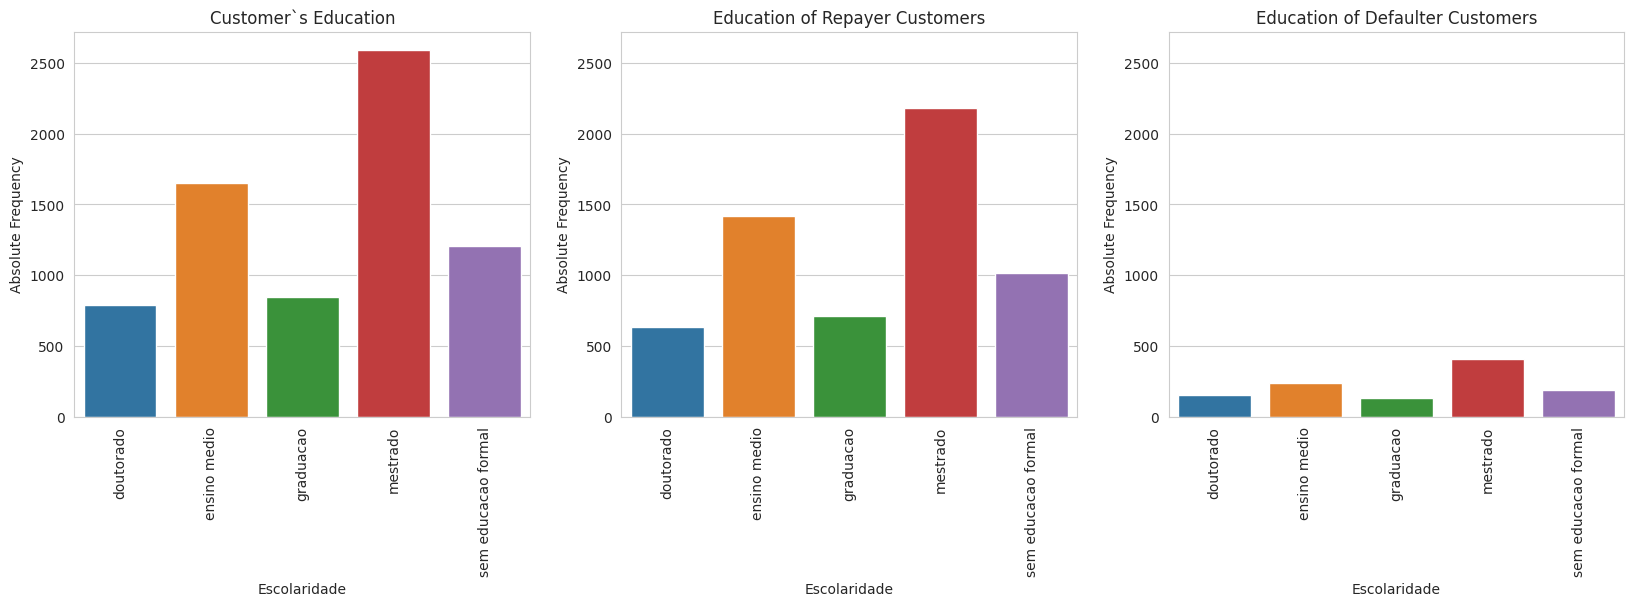

In [49]:
coluna = 'escolaridade'
titulos = ['Customer`s Education', 'Education of Repayer Customers', 'Education of Defaulter Customers']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-ANNUAL SALARY**

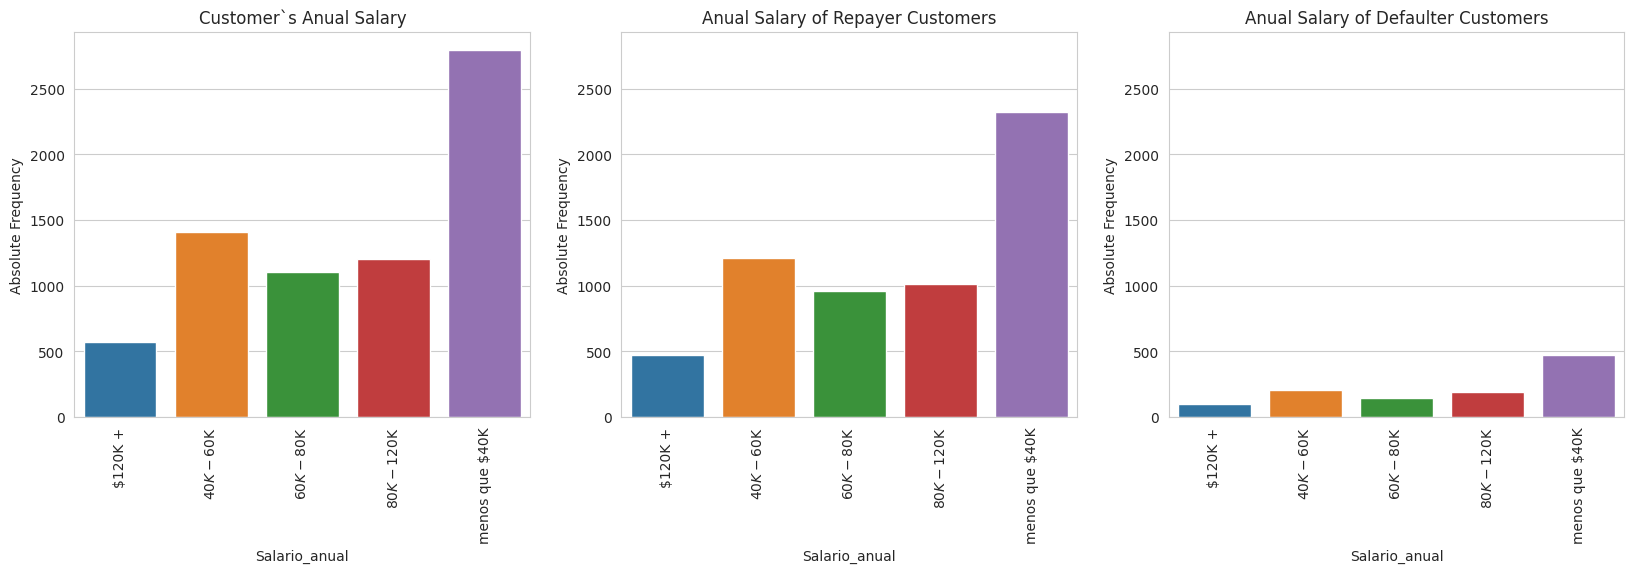

In [50]:
coluna = 'salario_anual'
titulos = ['Customer`s Anual Salary', 'Anual Salary of Repayer Customers', 'Anual Salary of Defaulter Customers']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

<a id="13"></a> <br>
### NUMERICAL VIEWS


In [51]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


**-CLIENT AGE**

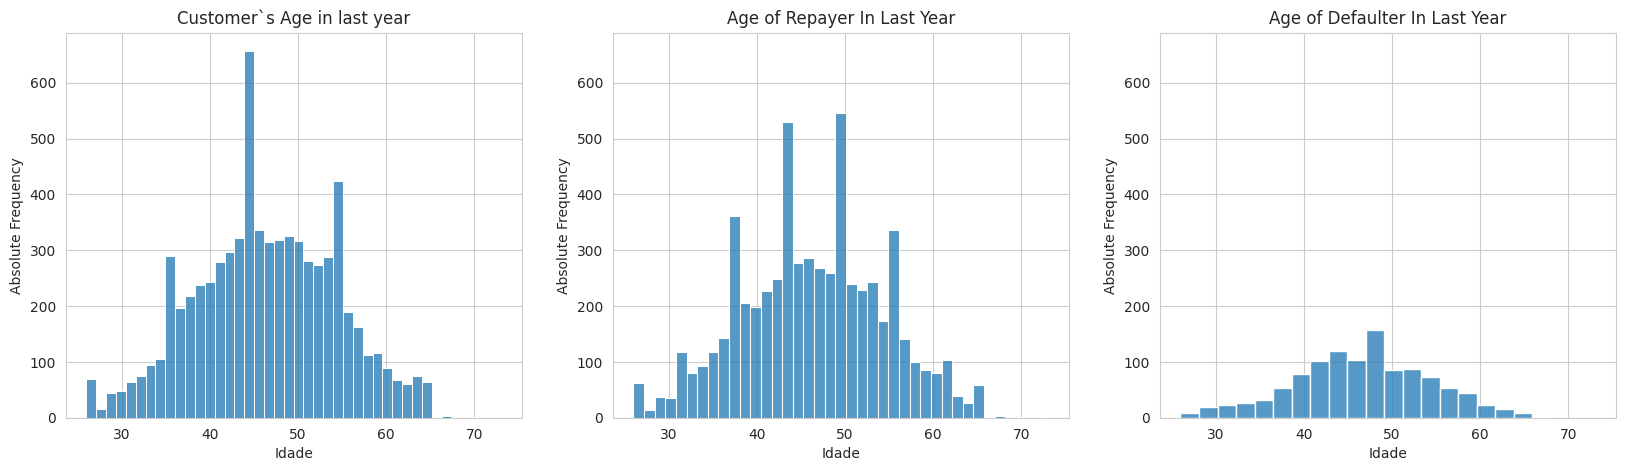

In [52]:
coluna = 'idade'
titulos = ['Customer`s Age in last year', 'Age of Repayer In Last Year', 'Age of Defaulter In Last Year']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-CREDIT LIMIT**

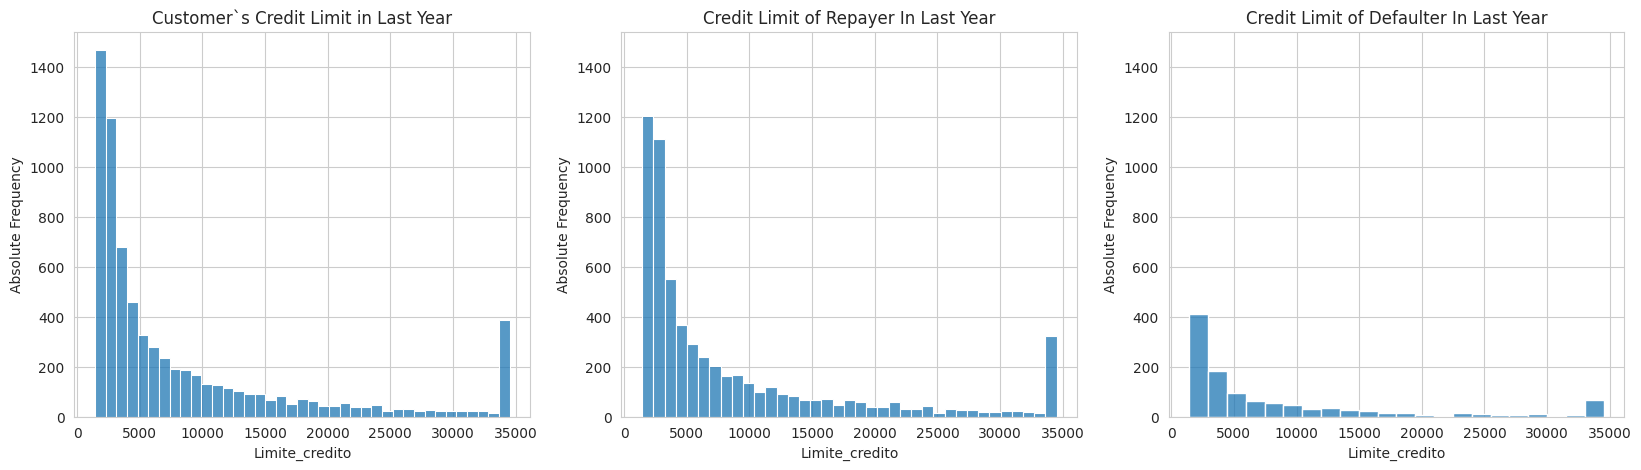

In [53]:
coluna = 'limite_credito'
titulos = ['Customer`s Credit Limit in Last Year', 'Credit Limit of Repayer In Last Year', 'Credit Limit of Defaulter In Last Year']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-NUMBER OF TRANSACTIONS IN THE LAST 12 MONTHS**

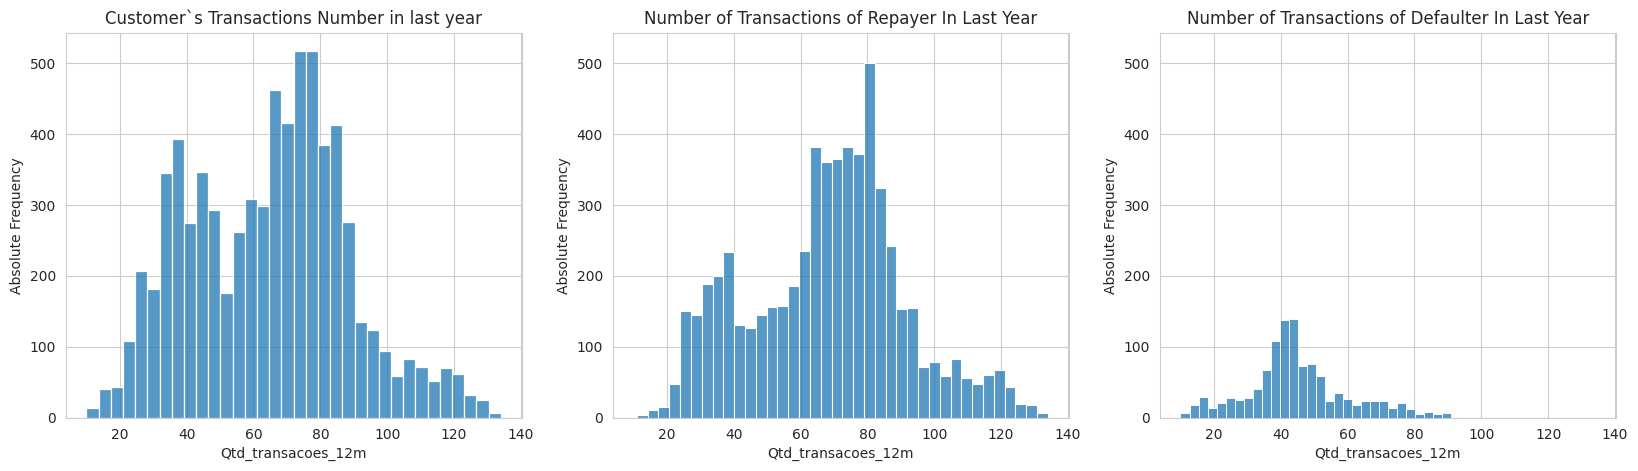

In [54]:
no_transactions_12m = 'qtd_transacoes_12m'
coluna = 'qtd_transacoes_12m'
titulos = ['Customer`s Transactions Number in last year', 'Number of Transactions of Repayer In Last Year', 'Number of Transactions of Defaulter In Last Year']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-VALUE OF TRANSACTIONS IN THE LAST 12 MONTHS**

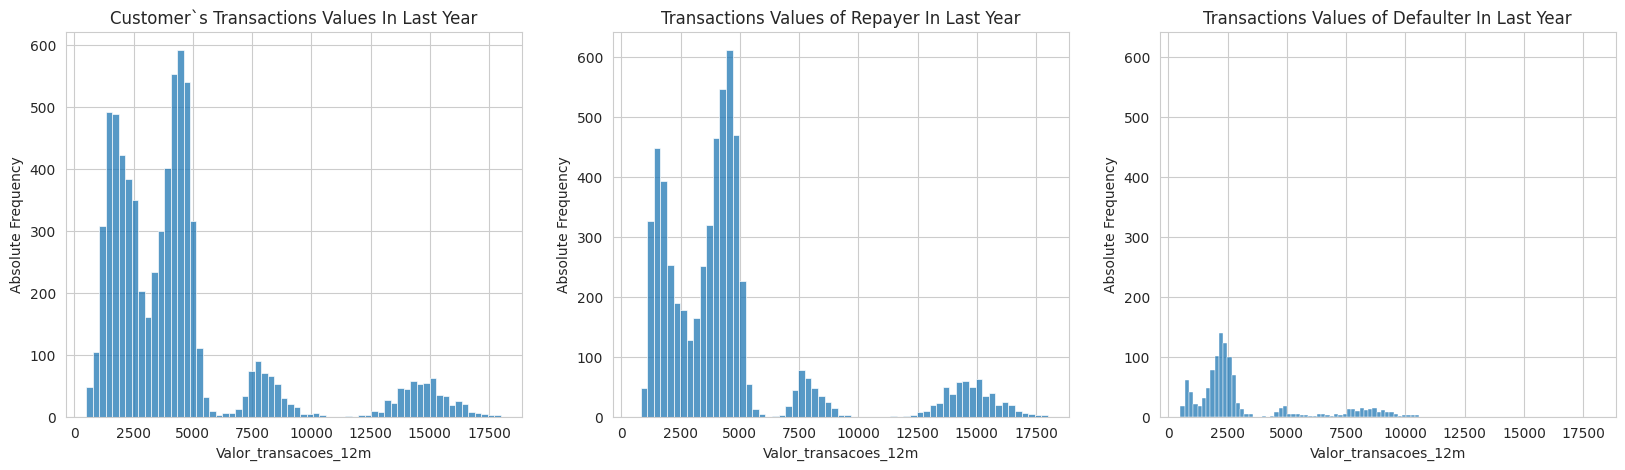

In [55]:
coluna = 'valor_transacoes_12m'
titulos = ['Customer`s Transactions Values In Last Year', 'Transactions Values of Repayer In Last Year', 'Transactions Values of Defaulter In Last Year']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_repayer, df_defaulter]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Absolute Frequency')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**-VALUE OF TRANSACTIONS IN THE LAST 12 MONTHS x NUMBER OF TRANSACTIONS IN THE LAST 12 MONTHS**

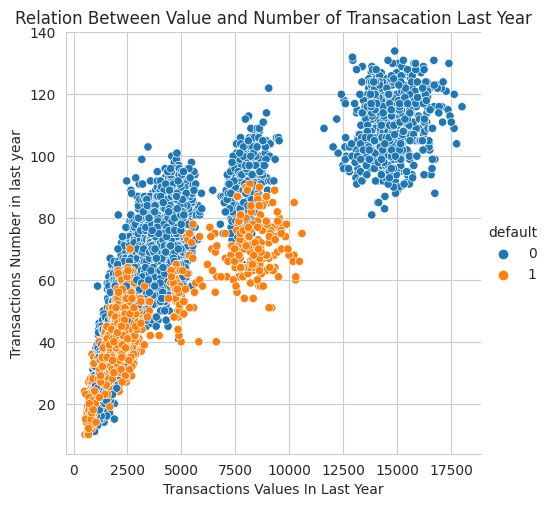

In [56]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relation Between Value and Number of Transacation Last Year',
    xlabel='Transactions Values In Last Year',
    ylabel='Transactions Number in last year'
  )

<a id="14"></a> <br>
# 7. **CONCLUSION**

After analysing the datasets, there are few characteristic of a client that we could not analyse like anual_salary, education and civil_status because they show the same behavior in the base chart, defaulter and non defaulter chart.Therefore, there are other attributes of a client with which the bank would be able to identify if they will repay the loan or not.The analysis is consised as below with the contributing factors and categorization:

<div class="alert alert-block alert-success">
    <b>Decisive Factor whether an applicant will be Repayer: </b>
    <li> Qtd_transacoes_12m: People who are in group of 60-80 transaction they have probability of less default and over 100 transactions have no default</li>
    <li> Valor_transacoes_12m: Clients that realize transactions in the values in the group of 12000,00-17500,00 have no default </li>
    <li> Credit_limit: Clients with credit limit over 20K are less likely to default </li>
</div>

<div class="alert alert-block alert-danger">
    <b>Decisive Factor whether an applicant will be Defaulter: </b>
    <li>Age: People who are in age group of 40-50 tend to default more than others </li>
    <li>Qtd_transacoes_12m: People who are in group of 30-50 number transaction they have probability of defaulting </li>
    <li>Valor_transacoes_12m: Clients that realize transactions in the values in the group of 1500,00-2500,00 are more likely to default </li>
     <li>Relation Between Value and Number of Transacation Last Year: Avoid clients that realize transactions in the values in the range of 0 and 3K and the group of 0-60 number of transaction</li>
    <li>Relation Between Value and Number of Transacation Last Year: Avoid clients that realize transactions in the values in the range of 7.5K and 10K and the group of 60-80 number of transaction</li>
</div>

<div class="alert alert-block alert-warning">
        <b>The following attributes indicate that people from these category tend to default but then due to the number of people and data it should enter in the bank tracking system </b>
    <li>Education: Person who has a doctorate tend to default more than graduated hence having interest specifically for this would be ideal.</li>
</div>